In [148]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import csv
import numpy as np
import statistics as stats
import seaborn as sns
House_Px = pd.read_csv("train.csv")

In [4]:
House_Px.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
House_Px.columns[House_Px.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_pct = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_pct], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [8]:
missing_values_table(House_Px)

,Missing Values,% of Total Values
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,93.767123
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


In [10]:
missin = missing_values_table(House_Px)

In [14]:
missin[missin['Missing Values'] != 0]

,Missing Values,% of Total Values
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


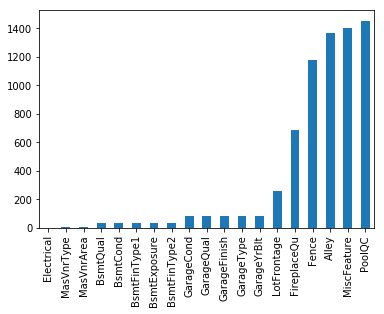

In [39]:
missing = House_Px.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [43]:
House_Px['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [51]:
House_Px.groupby('MSSubClass', as_index=False)['SalePrice'].mean()

,MSSubClass,SalePrice
0,20,185224.811567
1,30,95829.724638
2,40,156125.000000
3,45,108591.666667
4,50,143302.972222
5,60,239948.501672
6,70,166772.416667
7,75,192437.500000
8,80,169736.551724
9,85,147810.000000


In [52]:
House_Px.groupby('MSZoning', as_index=False)['SalePrice'].mean()

,MSZoning,SalePrice
0,C (all),74528.000000
1,FV,214014.061538
2,RH,131558.375000
3,RL,191004.994787
4,RM,126316.830275


In [54]:
House_Px.groupby('Street')['SalePrice'].mean()

Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64

In [55]:
House_Px.fillna('NoAccess').groupby('Alley')['SalePrice'].mean()

Alley
Grvl        122219.080000
NoAccess    183452.131483
Pave        168000.585366
Name: SalePrice, dtype: float64

In [56]:
House_Px.groupby('LotShape')['SalePrice'].mean()

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64

In [57]:
House_Px.groupby('LandContour')['SalePrice'].mean()

LandContour
Bnk    143104.079365
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Name: SalePrice, dtype: float64

In [58]:
House_Px.groupby('Utilities')['SalePrice'].mean()

Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

In [60]:
House_Px.groupby('LotConfig')['SalePrice'].mean()

LotConfig
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
Name: SalePrice, dtype: float64

In [61]:
House_Px.groupby('LandSlope')['SalePrice'].mean()

LandSlope
Gtl    179956.799566
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64

In [62]:
House_Px.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [63]:
House_Px.groupby('Condition1')['SalePrice'].mean()

Condition1
Artery    135091.666667
Feedr     142475.481481
Norm      184495.492063
PosA      225875.000000
PosN      215184.210526
RRAe      138400.000000
RRAn      184396.615385
RRNe      190750.000000
RRNn      212400.000000
Name: SalePrice, dtype: float64

In [64]:
House_Px.groupby('Condition2')['SalePrice'].mean()

Condition2
Artery    106500.000000
Feedr     121166.666667
Norm      181169.405536
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
RRAn      136905.000000
RRNn       96750.000000
Name: SalePrice, dtype: float64

In [65]:
House_Px.groupby('BldgType')['SalePrice'].mean()

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64

In [66]:
House_Px.groupby('HouseStyle')['SalePrice'].mean()

HouseStyle
1.5Fin    143116.740260
1.5Unf    110150.000000
1Story    175985.477961
2.5Fin    220000.000000
2.5Unf    157354.545455
2Story    210051.764045
SFoyer    135074.486486
SLvl      166703.384615
Name: SalePrice, dtype: float64

In [67]:
House_Px.groupby('OverallQual')['SalePrice'].mean()

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

In [68]:
House_Px.groupby('OverallCond')['SalePrice'].mean()

OverallCond
1     61000.000000
2    141986.400000
3    101929.400000
4    120438.438596
5    203146.914738
6    153961.591270
7    158145.487805
8    155651.736111
9    216004.545455
Name: SalePrice, dtype: float64

In [69]:
House_Px.groupby('RoofStyle')['SalePrice'].mean()

RoofStyle
Flat       194690.000000
Gable      171483.956179
Gambrel    148909.090909
Hip        218876.933566
Mansard    180568.428571
Shed       225000.000000
Name: SalePrice, dtype: float64

In [71]:
House_Px.groupby('RoofMatl')['SalePrice'].mean()

RoofMatl
ClyTile    160000.000000
CompShg    179803.679219
Membran    241500.000000
Metal      180000.000000
Roll       137000.000000
Tar&Grv    185406.363636
WdShake    241400.000000
WdShngl    390250.000000
Name: SalePrice, dtype: float64

In [72]:
House_Px.groupby('Exterior1st')['SalePrice'].mean()

Exterior1st
AsbShng    107385.550000
AsphShn    100000.000000
BrkComm     71000.000000
BrkFace    194573.000000
CBlock     105000.000000
CemntBd    231690.655738
HdBoard    163077.450450
ImStucc    262000.000000
MetalSd    149422.177273
Plywood    175942.379630
Stone      258500.000000
Stucco     162990.000000
VinylSd    213732.900971
Wd Sdng    149841.645631
WdShing    150655.076923
Name: SalePrice, dtype: float64

In [74]:
House_Px.groupby('Exterior2nd')['SalePrice'].mean()

Exterior2nd
AsbShng    114060.550000
AsphShn    138000.000000
Brk Cmn    126714.285714
BrkFace    195818.000000
CBlock     105000.000000
CmentBd    230093.833333
HdBoard    167661.565217
ImStucc    252070.000000
MetalSd    149803.172897
Other      319000.000000
Plywood    168112.387324
Stone      158224.800000
Stucco     155905.153846
VinylSd    214432.460317
Wd Sdng    148386.065990
Wd Shng    161328.947368
Name: SalePrice, dtype: float64

In [75]:
House_Px.groupby('MasVnrType')['SalePrice'].mean()

MasVnrType
BrkCmn     146318.066667
BrkFace    204691.871910
None       156221.891204
Stone      265583.625000
Name: SalePrice, dtype: float64

In [76]:
House_Px.groupby('ExterQual')['SalePrice'].mean()

ExterQual
Ex    367360.961538
Fa     87985.214286
Gd    231633.510246
TA    144341.313466
Name: SalePrice, dtype: float64

In [77]:
House_Px.groupby('ExterCond')['SalePrice'].mean()

ExterCond
Ex    201333.333333
Fa    102595.142857
Gd    168897.568493
Po     76500.000000
TA    184034.896256
Name: SalePrice, dtype: float64

In [78]:
House_Px.groupby('Foundation')['SalePrice'].mean()

Foundation
BrkTil    132291.075342
CBlock    149805.714511
PConc     225230.442040
Slab      107365.625000
Stone     165959.166667
Wood      185666.666667
Name: SalePrice, dtype: float64

In [79]:
House_Px.fillna('NoBasement').groupby('BsmtQual')['SalePrice'].mean()

BsmtQual
Ex            327041.041322
Fa            115692.028571
Gd            202688.478964
NoBasement    105652.891892
TA            140759.818182
Name: SalePrice, dtype: float64

In [80]:
House_Px.fillna('NoBasement').groupby('BsmtCond')['SalePrice'].mean()

BsmtCond
Fa            121809.533333
Gd            213599.907692
NoBasement    105652.891892
Po             64000.000000
TA            183632.620900
Name: SalePrice, dtype: float64

In [81]:
House_Px.fillna('NoBasement').groupby('BsmtExposure')['SalePrice'].mean()

BsmtExposure
Av            206643.420814
Gd            257689.805970
Mn            192789.657895
No            165652.295908
NoBasement    107938.342105
Name: SalePrice, dtype: float64

In [82]:
House_Px.fillna('NoBasement').groupby('BsmtFinType1')['SalePrice'].mean()

BsmtFinType1
ALQ           161573.068182
BLQ           149493.655405
GLQ           235413.720096
LwQ           151852.702703
NoBasement    105652.891892
Rec           146889.248120
Unf           170670.576744
Name: SalePrice, dtype: float64

In [83]:
House_Px.fillna('NoBasement').groupby('BsmtFinType2')['SalePrice'].mean()

BsmtFinType2
ALQ           209942.105263
BLQ           151101.000000
GLQ           180982.142857
LwQ           164364.130435
NoBasement    110346.236842
Rec           164917.129630
Unf           184694.690287
Name: SalePrice, dtype: float64

In [84]:
House_Px.groupby('Heating')['SalePrice'].mean()

Heating
Floor     72500.000000
GasA     182021.195378
GasW     166632.166667
Grav      75271.428571
OthW     125750.000000
Wall      92100.000000
Name: SalePrice, dtype: float64

In [85]:
House_Px.groupby('HeatingQC')['SalePrice'].mean()

HeatingQC
Ex    214914.429150
Fa    123919.489796
Gd    156858.871369
Po     87000.000000
TA    142362.876168
Name: SalePrice, dtype: float64

In [86]:
House_Px.groupby('CentralAir')['SalePrice'].mean()

CentralAir
N    105264.073684
Y    186186.709890
Name: SalePrice, dtype: float64

In [87]:
House_Px.groupby('Electrical')['SalePrice'].mean()

Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
SBrkr    186825.113193
Name: SalePrice, dtype: float64

In [88]:
House_Px.groupby('KitchenQual')['SalePrice'].mean()

KitchenQual
Ex    328554.670000
Fa    105565.205128
Gd    212116.023891
TA    139962.511565
Name: SalePrice, dtype: float64

In [89]:
House_Px.groupby('Functional')['SalePrice'].mean()

Functional
Maj1    153948.142857
Maj2     85800.000000
Min1    146385.483871
Min2    144240.647059
Mod     168393.333333
Sev     129000.000000
Typ     183429.147059
Name: SalePrice, dtype: float64

In [90]:
House_Px.fillna('NoFireplace').groupby('FireplaceQu')['SalePrice'].mean()

FireplaceQu
Ex             337712.500000
Fa             167298.484848
Gd             226351.415789
NoFireplace    141331.482609
Po             129764.150000
TA             205723.488818
Name: SalePrice, dtype: float64

In [91]:
House_Px.fillna('NoGarage').groupby('GarageType')['SalePrice'].mean()

GarageType
2Types      151283.333333
Attchd      202892.656322
Basment     160570.684211
BuiltIn     254751.738636
CarPort     109962.111111
Detchd      134091.162791
NoGarage    103317.283951
Name: SalePrice, dtype: float64

In [92]:
House_Px.fillna('NoGarage').groupby('GarageFinish')['SalePrice'].mean()

GarageFinish
Fin         240052.690341
NoGarage    103317.283951
RFn         202068.869668
Unf         142156.423140
Name: SalePrice, dtype: float64

In [93]:
House_Px.fillna('NoGarage').groupby('GarageQual')['SalePrice'].mean()

GarageQual
Ex          241000.000000
Fa          123573.354167
Gd          215860.714286
NoGarage    103317.283951
Po          100166.666667
TA          187489.836003
Name: SalePrice, dtype: float64

In [94]:
House_Px.fillna('NoGarage').groupby('GarageCond')['SalePrice'].mean()

GarageCond
Ex          124000.000000
Fa          114654.028571
Gd          179930.000000
NoGarage    103317.283951
Po          108500.000000
TA          187885.735294
Name: SalePrice, dtype: float64

In [95]:
House_Px.groupby('PavedDrive')['SalePrice'].mean()

PavedDrive
N    115039.122222
P    132330.000000
Y    186433.973881
Name: SalePrice, dtype: float64

In [96]:
House_Px.fillna('NoPool').groupby('PoolQC')['SalePrice'].mean()

PoolQC
Ex        490000.000000
Fa        215500.000000
Gd        201990.000000
NoPool    180404.663455
Name: SalePrice, dtype: float64

In [98]:
House_Px.fillna('NoFence').groupby('Fence')['SalePrice'].mean()

Fence
GdPrv      178927.457627
GdWo       140379.314815
MnPrv      148751.089172
MnWw       134286.363636
NoFence    187596.837998
Name: SalePrice, dtype: float64

In [99]:
House_Px.fillna('NothinElse').groupby('MiscFeature')['SalePrice'].mean()

MiscFeature
Gar2          170750.000000
NothinElse    182046.410384
Othr           94000.000000
Shed          151187.612245
TenC          250000.000000
Name: SalePrice, dtype: float64

In [100]:
House_Px.groupby('SaleType')['SalePrice'].mean()

SaleType
COD      143973.255814
CWD      210600.000000
Con      269600.000000
ConLD    138780.888889
ConLI    200390.000000
ConLw    143700.000000
New      274945.418033
Oth      119850.000000
WD       173401.836622
Name: SalePrice, dtype: float64

In [101]:
House_Px.groupby('SaleCondition')['SalePrice'].mean()

SaleCondition
Abnorml    146526.623762
AdjLand    104125.000000
Alloca     167377.416667
Family     149600.000000
Normal     175202.219533
Partial    272291.752000
Name: SalePrice, dtype: float64

In [129]:
House_Px.iloc[0,:]

Id                     1
MSSubClass            60
MSZoning              RL
LotFrontage           65
LotArea             8450
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           2003
YearRemodAdd        2003
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           196
ExterQual             Gd
ExterCond             TA
Foundation         PConc
                  ...   
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           Gd
TotRmsAbvGrd           8
Functional           Typ
Fireplaces             0
FireplaceQu          NaN
GarageType        Attchd
GarageYrBlt         2003


In [103]:
Cont_var = House_Px[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']]

In [110]:
Cont_var.replace(0,np.nan).describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,591.000000,993.000000,167.000000,1342.000000,1423.000000,1460.000000,631.000000,26.000000,1460.000000,1379.000000,699.000000,804.000000,208.000000,24.000000,116.000000,7.000000,52.000000,1460.000000
mean,70.049958,10516.828082,254.739425,652.279960,406.958084,617.116990,1084.924104,1162.626712,802.866878,328.192308,1515.463699,500.762146,196.848355,84.731343,154.100962,207.416667,189.560345,575.428571,1221.038462,180921.195890
std,24.284752,9981.264932,205.144174,411.980316,284.909420,426.174012,409.413709,386.587738,273.346959,167.186128,525.480383,185.680520,112.299729,68.893171,76.596215,101.825049,77.952191,89.840335,2361.239704,79442.502883
min,21.000000,1300.000000,1.000000,2.000000,28.000000,14.000000,105.000000,334.000000,110.000000,53.000000,334.000000,160.000000,12.000000,4.000000,19.000000,23.000000,40.000000,480.000000,54.000000,34900.000000
25%,59.000000,7553.500000,113.000000,371.000000,178.500000,288.000000,810.500000,882.000000,625.000000,168.250000,1129.500000,380.000000,120.000000,39.000000,104.250000,150.750000,143.750000,515.500000,437.500000,129975.000000
50%,69.000000,9478.500000,203.000000,604.000000,354.000000,536.000000,1004.000000,1087.000000,776.000000,377.500000,1464.000000,484.000000,171.000000,63.000000,144.500000,180.000000,180.000000,555.000000,500.000000,163000.000000
75%,80.000000,11601.500000,330.500000,867.000000,551.000000,843.250000,1309.500000,1391.250000,926.500000,477.500000,1776.750000,580.000000,240.000000,112.000000,205.000000,239.750000,224.000000,612.000000,887.500000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


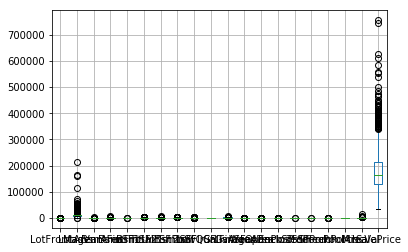

In [113]:
Cont_var.replace(0,np.nan).boxplot()

In [130]:
Disc_var = House_Px[['YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','MoSold','YrSold']]

In [151]:
Disc_var.agg({'min','max','median', stats.mode}).transpose()

,mode,min,median,max
YearBuilt,2006.0,1872.0,1973.0,2010.0
YearRemodAdd,1950.0,1950.0,1994.0,2010.0
BsmtFullBath,0.0,0.0,0.0,3.0
BsmtHalfBath,0.0,0.0,0.0,2.0
FullBath,2.0,0.0,2.0,3.0
HalfBath,0.0,0.0,0.0,2.0
BedroomAbvGr,3.0,0.0,3.0,8.0
KitchenAbvGr,1.0,0.0,1.0,3.0
TotRmsAbvGrd,6.0,2.0,6.0,14.0
Fireplaces,0.0,0.0,1.0,3.0


In [155]:
Disc_var.agg({'min','max','median', stats.mode, lambda x: max(x)-min(x)}).transpose()

,max,mode,<lambda>,min,median
YearBuilt,2010.0,2006.0,138.0,1872.0,1973.0
YearRemodAdd,2010.0,1950.0,60.0,1950.0,1994.0
BsmtFullBath,3.0,0.0,3.0,0.0,0.0
BsmtHalfBath,2.0,0.0,2.0,0.0,0.0
FullBath,3.0,2.0,3.0,0.0,2.0
HalfBath,2.0,0.0,2.0,0.0,0.0
BedroomAbvGr,8.0,3.0,8.0,0.0,3.0
KitchenAbvGr,3.0,1.0,3.0,0.0,1.0
TotRmsAbvGrd,14.0,6.0,12.0,2.0,6.0
Fireplaces,3.0,0.0,3.0,0.0,1.0


In [136]:
House_Px.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
